In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df= pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Questions:
1. IN WHICH CATEGORY DO PEOPLE BOOK THE MOST UBER RIDES?
2. FOR WHICH PURPOSE DO PEOPLE BOOK THE UBER RIDES THE MOST?
3. AT WHAT TIME DO PEOPLE BOOK CABS THE MOST FROM UBER?
4. IN WHICH MONTHS DO PEOPLE BOOK UBER RIDES LESS FREQUENTLY?
5. ON WHICH DAYS OF THE WEEK DO PEOPLE BOOK UBER RIDES THE MOST?
6. HOW MANY MILES DO PEOPLE USUALLY BOOK A CAB FOR, THROUGH UBER?

In [195]:
df.shape

(1156, 7)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [199]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [297]:
df.duplicated().sum()

0

# Summary and requirements:

1. Drop END_DATE, START, STOP columns
2. START_DATE: object to datetime dtype

In [204]:
drop_cols=['END_DATE', 'START', 'STOP']
df.drop(drop_cols, axis=1, inplace=True)

In [206]:
df.head()

,START_DATE,CATEGORY,MILES,PURPOSE
0,01-01-2016 21:11,Business,5.1,Meal/Entertain
1,01-02-2016 01:25,Business,5.0,NaN
2,01-02-2016 20:25,Business,4.8,Errand/Supplies
3,01-05-2016 17:31,Business,4.7,Meeting
4,01-06-2016 14:42,Business,63.7,Customer Visit


In [208]:
df['PURPOSE'].fillna('NOT', inplace=True)

C:\Users\ricmm\AppData\Local\Temp\ipykernel_7092\2911351005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT', inplace=True)


In [210]:
df.head()

,START_DATE,CATEGORY,MILES,PURPOSE
0,01-01-2016 21:11,Business,5.1,Meal/Entertain
1,01-02-2016 01:25,Business,5.0,NOT
2,01-02-2016 20:25,Business,4.8,Errand/Supplies
3,01-05-2016 17:31,Business,4.7,Meeting
4,01-06-2016 14:42,Business,63.7,Customer Visit


In [253]:
df['START_DATE']=pd.to_datetime(df['START_DATE'], errors='coerce')

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  414 non-null    datetime64[ns]
 1   CATEGORY    414 non-null    object        
 2   MILES       414 non-null    float64       
 3   PURPOSE     414 non-null    object        
 4   DATE        414 non-null    object        
 5   TIME        414 non-null    float64       
 6   DAY-NIGHT   414 non-null    category      
 7   MONTH       414 non-null    object        
 8   DAY         414 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 29.7+ KB


In [257]:
from datetime import datetime

df['DATE']= pd.DatetimeIndex(df['START_DATE']).date
df['TIME']= pd.DatetimeIndex(df['START_DATE']).hour

In [259]:
df.head()

,START_DATE,CATEGORY,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,Business,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,Business,5.0,NOT,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,Business,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,Business,4.7,Meeting,2016-01-05,17,Evening,Jan,Tue
4,2016-01-06 14:42:00,Business,63.7,Customer Visit,2016-01-06,14,Day,Jan,Wed


In [261]:
df['DAY-NIGHT']=pd.cut(x= df['TIME'], bins= [0,10,15,19,24], labels=['Morning','Day','Evening', 'Night'])

In [263]:
df.head()

,START_DATE,CATEGORY,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,Business,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,Business,5.0,NOT,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,Business,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,Business,4.7,Meeting,2016-01-05,17,Evening,Jan,Tue
4,2016-01-06 14:42:00,Business,63.7,Customer Visit,2016-01-06,14,Day,Jan,Wed


In [265]:
df.dropna(inplace=True)

In [267]:
df.shape

(414, 9)

<Axes: xlabel='count', ylabel='PURPOSE'>

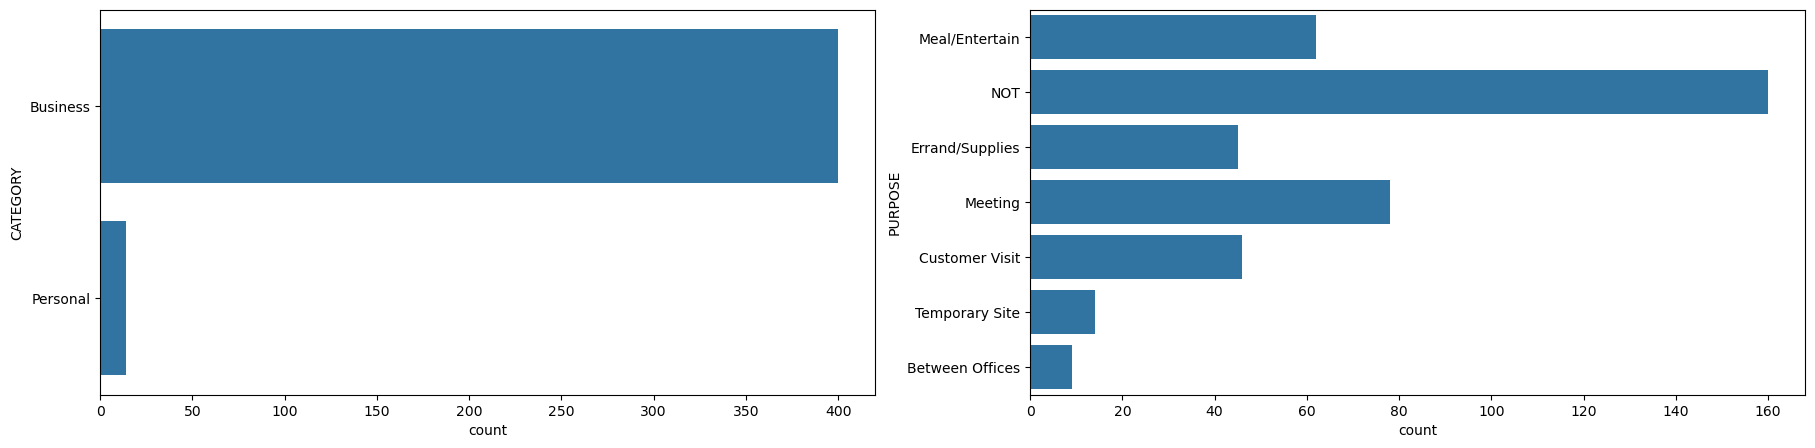

In [269]:
plt.figure(figsize=(22,5))

plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])

<Axes: xlabel='count', ylabel='DAY-NIGHT'>

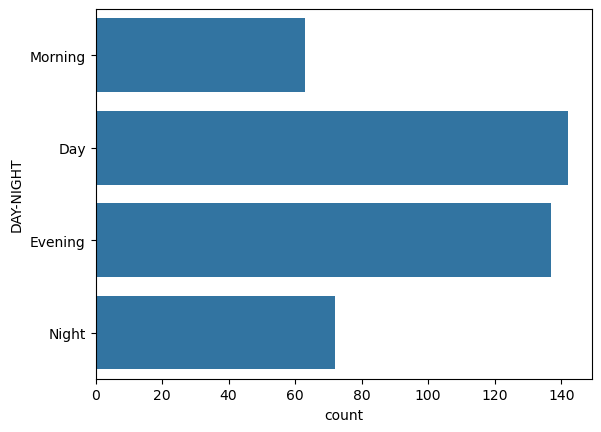

In [271]:
sns.countplot(df['DAY-NIGHT'])

In [273]:
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month

month_label = {1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'Apr', 5.0:'May', 6.0:'Jun', 7.0:'Jul', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}

df['MONTH']=df.MONTH.map(month_label)

In [275]:
df.head()

,START_DATE,CATEGORY,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,Business,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,Business,5.0,NOT,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,Business,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,Business,4.7,Meeting,2016-01-05,17,Evening,Jan,Tue
4,2016-01-06 14:42:00,Business,63.7,Customer Visit,2016-01-06,14,Day,Jan,Wed


In [277]:
mon=df.MONTH.value_counts(sort=False)

df_2=pd.DataFrame({
    'MONTHS': mon.values,
    'Value_Counts':df.groupby('MONTH', sort=False)['MILES'].sum()
})

df_2.head()

,MONTHS,Value_Counts
MONTH,,
Jan,23,183.6
Feb,40,309.0
Mar,42,259.3
Apr,24,813.8
May,26,239.0


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'Total_miles')]

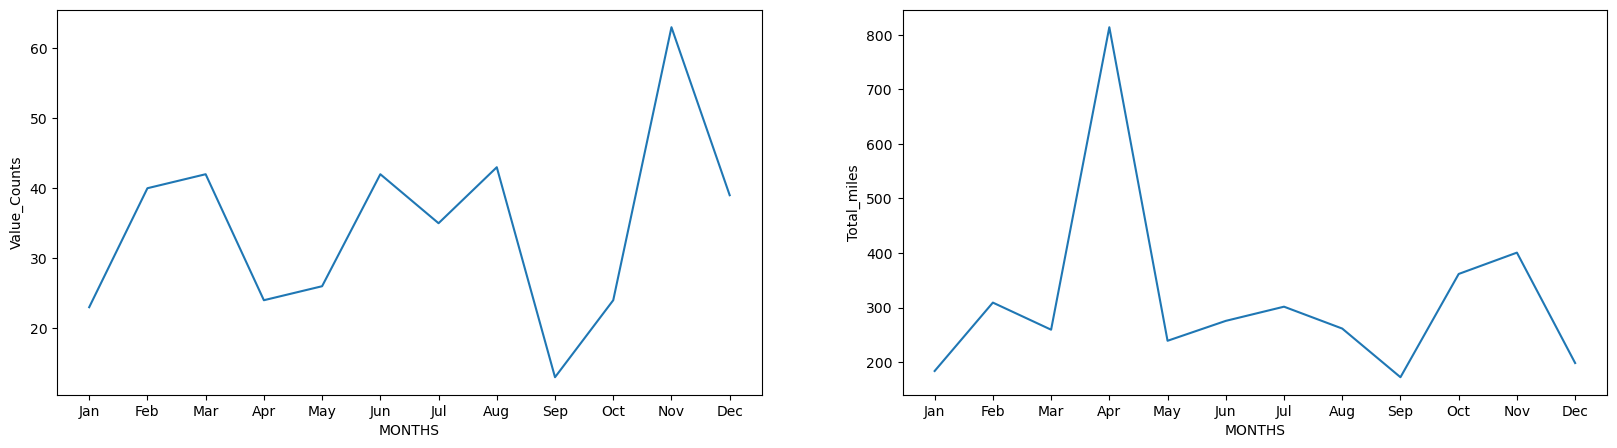

In [279]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
p=sns.lineplot(data=df_2['MONTHS'])
p.set(xlabel='MONTHS', ylabel='Value_Counts')

plt.subplot(1,2,2)
q=sns.lineplot(data=df_2['Value_Counts'])
q.set(xlabel='MONTHS', ylabel='Total_miles')

In [301]:
df['DAY']=df.START_DATE.dt.weekday
day_label={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

df['DAY']=df['DAY'].map(day_label)

In [303]:
df.head()

,START_DATE,CATEGORY,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,Business,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,Business,5.0,NOT,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,Business,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,Business,4.7,Meeting,2016-01-05,17,Evening,Jan,Tue
4,2016-01-06 14:42:00,Business,63.7,Customer Visit,2016-01-06,14,Day,Jan,Wed


[Text(0.5, 0, 'DAY'), Text(0, 0.5, 'Count')]

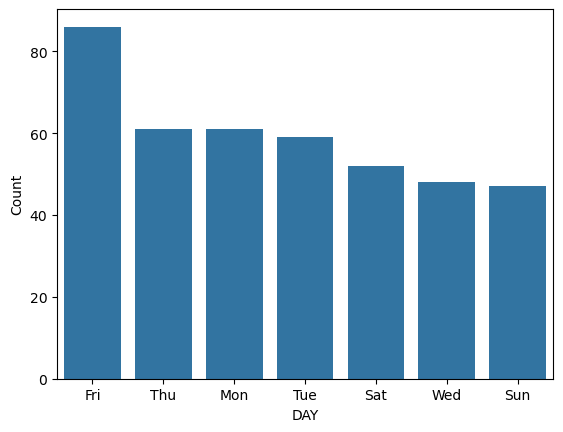

In [315]:
day_label=df['DAY'].value_counts()


r=sns.barplot(x=day_label.index, y=day_label)
r.set(xlabel='DAY', ylabel='Count')

<Axes: ylabel='MILES'>

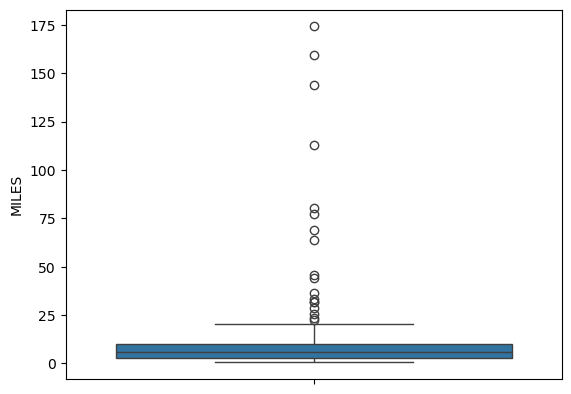

In [246]:
sns.boxplot(data=df['MILES'])

<Axes: ylabel='MILES'>

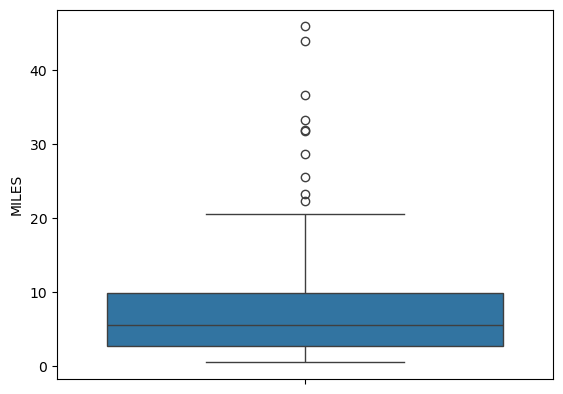

In [248]:
sns.boxplot(data=df[df['MILES']<50]['MILES'])

C:\Users\ricmm\AppData\Local\Temp\ipykernel_7092\2793782046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<50]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

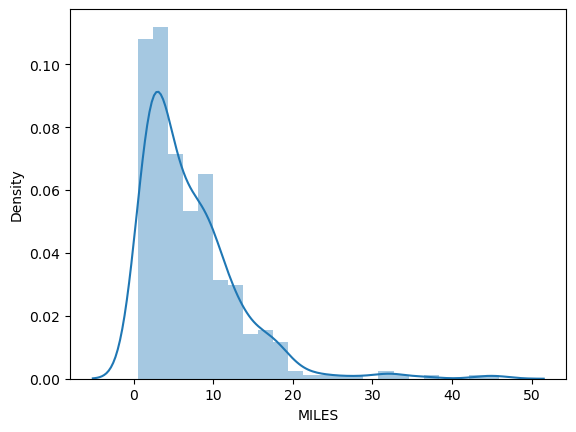

In [249]:
sns.distplot(df[df['MILES']<50]['MILES'])

# Conclusion Summary:

1. IN WHICH CATEGORY DO PEOPLE BOOK THE MOST UBER RIDES?
    - People book most of the uber rides in 'Business' Category.
      +
2. FOR WHICH PURPOSE DO PEOPLE BOOK THE UBER RIDES THE MOST?
    - People book the uber rides mostly for 'Meeting' in all the known purposes.
      +
3. AT WHAT TIME DO PEOPLE BOOK CABS THE MOST FROM UBER?
    - Most of the rides are booked in 'DAY' time likely from 10:00 to 15:00.
      +
4. IN WHICH MONTHS DO PEOPLE BOOK UBER RIDES LESS FREQUENTLY?
    - 'September' is the most with least booking for uber rides.
      +
5. ON WHICH DAYS OF THE WEEK DO PEOPLE BOOK UBER RIDES THE MOST?
    - On 'Friday', people book uber rides the most.
      +
6. HOW MANY MILES DO PEOPLE USUALLY BOOK A CAB FOR, THROUGH UBER?
    - Usually people book cab for travelling '0-10 miles' (ignoring outliers).